<h1><center>AIRCRAFT RISK ANALYSIS!</center></h1>

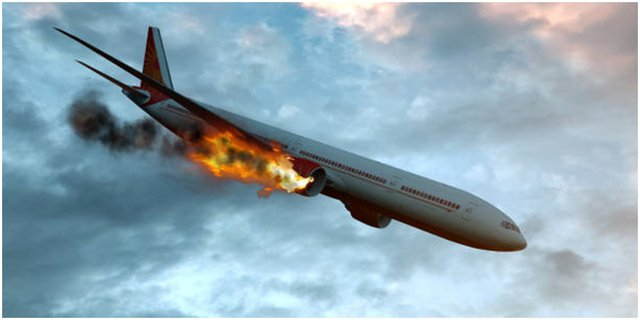

### Overview
To provide actionable insights for the company's new aviation division, we'll analyze the dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. 
Our goal is to identify aircraft with the lowest risk, guiding the company in selecting safe aircraft for their new venture. 
The process will involve data cleaning, imputation, analysis, and visualization.


### Business Problem

The company is expanding into the aviation industry and needs to determine which aircraft types are the lowest risk to purchase. This analysis will help the head of the new aviation division make informed decisions about which aircraft to acquire for commercial and private enterprises.



#### Objectives:

MAIN GOAL:
Identify aircraft models that offer the lowest risk profile for purchase and operation, aligning with the company's strategic expansion into the aviation sector.

SPECIFIC OBJECTIVES:

1. Determine the safety performance of different aircraft models by analyzing historical accident data.
2. Differentiate between aircraft suitable for commercial ventures and those more suitable for private use, based on risk assessment and operational requirements.

### Data Understanding
The [dataset](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses) contains information on aviation accidents from 1962 to 2023, detailing various aspects such as aircraft type, injury severity, and accident location. Many columns have missing values and inconsistent data types, necessitating thorough cleaning and preprocessing. Key tasks include handling missing values, converting data types for accurate analysis, and extracting relevant information from categorical data. This preparation is essential for identifying low-risk aircraft and providing actionable insights for the company's new aviation division.

## Step 1: Data Collection

In [1]:
#Importing necessary libraries
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the US State dataset
US_State_df = pd.read_csv('data/USState_Codes.csv')
# Previewing the top of our dataset
US_State_df.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [3]:
#Loading the aviation dataset
aviation_df = pd.read_csv('data/AviationData.csv', encoding = 'ISO-8859-1', low_memory = False)
# Previewing the top and bottom of our dataset
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Data Inspection and Exploration

In [4]:
#Checking the size of the DataFrame
aviation_df.shape

(88889, 31)

In [5]:
# Checking whether each column has an appropriate datatype
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [6]:
#Getting the summary statistics of the numerical data 
aviation_df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


The DataFrame contains 88,889 entries with 31 columns. The data is primarily categorical, with many columns containing missing values. The Latitude and Longitude columns have a significant amount of missing data, which may impact geographic analysis. 5 columns are numeric and contain float values, the remaining 26 columns are categorical.

## Step 2: Data Cleaning and preparation


Identify duplicated and missing values

In [7]:
# Check for duplicated rows in the dataframe
aviation_df.duplicated().sum()


0

In [8]:
# Check for missing values
print(aviation_df.isnull().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [9]:
# Check for duplicated values in the 'Registration.Number' and 'Event.Id' columns since they should have unique values
reg_no_duplicates = aviation_df['Registration.Number'].duplicated().sum()
event_id_duplicates = aviation_df['Event.Id'].duplicated().sum()

print('reg_no_duplicates:', reg_no_duplicates)
print('event_id_duplicates:', event_id_duplicates)

reg_no_duplicates: 9783
event_id_duplicates: 938


In [10]:
#dropping the duplicate values but retaining the first of each
aviation_df.drop_duplicates(subset = ['Registration.Number'], keep='first', inplace=True)
aviation_df.drop_duplicates(subset = ['Event.Id'], keep='first', inplace=True)

In [11]:
# Splitting date field in the components
aviation_df['Year'] = aviation_df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").year)
aviation_df['Month'] = aviation_df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").month)
aviation_df['Day'] = aviation_df['Event.Date'].apply(lambda d: datetime.datetime.strptime(d, "%Y-%m-%d").day)

aviation_df = aviation_df[aviation_df['Year'] >= 1962] # Getting rid of data before 1962

In [12]:
# United States is overrepresented in Country column more than 90% of the Country column is the United States. 
# As the focus is on the US aviation accidents create a new dataframe df_us to focus on the United States
df_us = aviation_df[aviation_df['Country'] == 'United States']

In [13]:
# Extract US State abbreviations
state_abbreviations = US_State_df['Abbreviation'].str.strip().tolist()

# Function to extract city and state from the location string
def extract_city_state(location):
    if pd.notna(location):
        location = location.strip()
        last_two_chars = location[-2:].upper()
        if last_two_chars in state_abbreviations:
            return location[:-4].strip(), last_two_chars
        else:
            return location, "Not Applicable" # Some accidents have not happened in a particular state
    else:
        return np.nan, np.nan

# Apply the function to extract City and State
df_us[['City', 'State']]= df_us['Location'].apply(extract_city_state).apply(pd.Series)

# Getting rid of trailing commas in City column and capitalizing the City name
df_us.loc[:, 'City'] = df_us['City'].str.rstrip(',').str.title()


# print(df_us[['Location', 'City', 'State']].head())

C:\Users\Han\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Han\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


Dropping columns that aren't important for this analysis

In [14]:
columns_to_drop = ['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description',
                   'Schedule', 'Air.carrier', 'Accident.Number', 'Amateur.Built', 
                   'Publication.Date', 'Publication.Date', 'Engine.Type',
                  'Event.Date', 'Location']# Dropping the 'Event.Date' and 'Location' columns having divided them

df_clean = df_us.drop(columns = columns_to_drop)

Handling missing values based on the context

In [15]:
# Fill missing values in numerical columns with mean
numerical_columns = df_clean.select_dtypes(include=['number']).columns

for column in numerical_columns:
    df_clean[column].fillna(df_clean[column].mean(), inplace=True)
    #print(column , df_clean[column].unique()) 

In [16]:
# Replace null values in categorical features with 'Unknown'
categorical_columns = df_clean.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df_clean[column].fillna('Unknown', inplace=True) 
    # print(column , df_clean[column].unique()) #prints unique values of categorical variables of the clean dataframe

Normalization of the dataset for consistency

In [17]:
# Replacing 'Unk' with 'UNK' in 'Weather.Condition column
df_clean['Weather.Condition'] = df_clean['Weather.Condition'].replace('Unk', 'UNK')

# Creating a new Fatality column with less missing numerical data
df_clean['Fatality'] = df_clean['Injury.Severity'].str.extract(r'\((\d+)\)')
df_clean['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0, 'Unavailable': 0, np.nan: 0}, inplace=True)
df_clean['Fatality'] = df_clean.apply(lambda row: row['Total.Fatal.Injuries'] if row['Fatality'] == 'Fatal' else row['Fatality'], axis=1)
df_clean['Fatality'] = df_clean['Fatality'].astype(int)  # converting the Fatality from string to Integer values
df_clean.drop(columns=['Total.Fatal.Injuries'], inplace=True)  # dropping Fatal_injuries column

# Replacing similar values with a single standardized value in Purpose.of.flight
df_clean['Purpose.of.flight'] = df_clean['Purpose.of.flight'].replace({
    'Air Race/show': 'Air Race/Show', 'Air Race show': 'Air Race/Show',
    'Public Aircraft - Federal': 'Public Aircraft', 'Public Aircraft - State': 'Public Aircraft',
    'Public Aircraft - Local': 'Public Aircraft', 'Aerial Observation': 'Aerial Observation/Application',
    'Aerial Application': 'Aerial Observation/Application', 'PUBS': 'Public Aircraft',
    'PUBL': 'Public Aircraft',  'ASHO': 'Air Race/Show' })

df_clean['Aircraft.Category'] = df_clean['Aircraft.Category'].replace({'WSFT': 'Weight-Shift', 'ULTR': 'Ultralight'})

# Standardizing 'Make' column to uppercase
df_clean['Make'] = df_clean['Make'].str.upper()

# Replacing 'Not Applicable'with 'Unknown' in 'State' column
df_clean['State'] = df_clean['State'].replace('Not Applicable', 'Unknown')


# Renaming columns for better readability
new_column_names = {'Event.Id': 'ID', 'Investigation.Type': 'Type', 'Aircraft.damage': 'Damage_type', 
                    'Aircraft.Category': 'Aircraft_Category', 'Registration.Number': 'Registration_Number', 
                    'Number.of.Engines': 'Engines', 'Purpose.of.flight': 'Flight_Purpose',
                    'Injury.Severity': 'Injury_Severity', 'Total.Serious.Injuries': 'Serious_Injuries',
                    'Total.Minor.Injuries': 'Minor_Injuries', 'Total.Uninjured': 'Uninjured', 
                    'Weather.Condition': 'Weather_Condition', 'Broad.phase.of.flight': 'Phase_of_Flight', 'Report.Status': 'Report_Status'}
df_clean.rename(columns=new_column_names, inplace=True)

In [18]:
# Function to standardize the 'Injury.Severity' column
def standardize_injury_severity(severity):
    if 'Fatal' in severity:
        return 'Fatal'
    return severity
# Apply the function to the 'Injury_Severity' column
df_clean['Injury_Severity'] = df_clean['Injury_Severity'].apply(standardize_injury_severity)

# Replacing 'Not Applicable'with 'Unknown' in 'State' column
df_clean['Injury_Severity'] = df_clean['Injury_Severity'].replace('Unavailable', 'Unknown')# Returns ['Fatal', 'Incident', 'Unknown', 'Minor', 'Serious']

Checking for Outliers

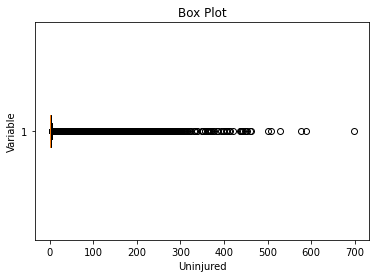

In [19]:
plt.boxplot(df_clean['Uninjured'], vert=False) 
plt.ylabel('Variable') 
plt.xlabel('Uninjured') 
plt.title('Box Plot') 
plt.show()

The boxplot reveals outliers in the number of uninjured. Understanding these outliers helps identify anomalies in the data, which can inform safety measures and aircraft selection.

In [20]:
# Final check of the cleaned dataframe
print(df_clean.info())
print(df_clean.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73232 entries, 1 to 88888
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   73232 non-null  object 
 1   Type                 73232 non-null  object 
 2   Country              73232 non-null  object 
 3   Injury_Severity      73232 non-null  object 
 4   Damage_type          73232 non-null  object 
 5   Aircraft_Category    73232 non-null  object 
 6   Registration_Number  73232 non-null  object 
 7   Make                 73232 non-null  object 
 8   Model                73232 non-null  object 
 9   Engines              73232 non-null  float64
 10  Flight_Purpose       73232 non-null  object 
 11  Serious_Injuries     73232 non-null  float64
 12  Minor_Injuries       73232 non-null  float64
 13  Uninjured            73232 non-null  float64
 14  Weather_Condition    73232 non-null  object 
 15  Phase_of_Flight      73232 non-null 

In [21]:
df_clean.tail()

,ID,Type,Country,Injury_Severity,Damage_type,Aircraft_Category,Registration_Number,Make,Model,Engines,...,Uninjured,Weather_Condition,Phase_of_Flight,Report_Status,Year,Month,Day,City,State,Fatality
88884,20221227106491,Accident,United States,Minor,Unknown,Unknown,N1867H,PIPER,PA-28-151,1.138622,...,0.0,Unknown,Unknown,Unknown,2022,12,26,Annapolis,MD,0
88885,20221227106494,Accident,United States,Unknown,Unknown,Unknown,N2895Z,BELLANCA,7ECA,1.138622,...,0.0,Unknown,Unknown,Unknown,2022,12,26,Hampton,NH,0
88886,20221227106497,Accident,United States,Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.000000,...,1.0,VMC,Unknown,Unknown,2022,12,26,Payson,AZ,0
88887,20221227106498,Accident,United States,Unknown,Unknown,Unknown,N210CU,CESSNA,210N,1.138622,...,0.0,Unknown,Unknown,Unknown,2022,12,26,Morgan,UT,0
88888,20221230106513,Accident,United States,Minor,Unknown,Unknown,N9026P,PIPER,PA-24-260,1.138622,...,1.0,Unknown,Unknown,Unknown,2022,12,29,Athens,GA,0


## Step 3: Exploratory data analysis (EDA)

##### Is there a trend in the number of accidents over years?

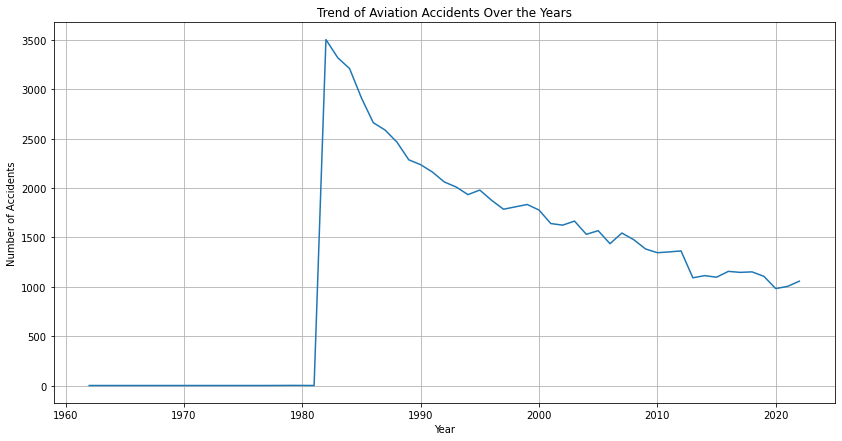

In [22]:
# Aggregating the number of accidents per year
accidents_per_year = df_clean['Year'].value_counts().sort_index()

# Plotting the trend of accidents over the years
plt.figure(figsize=(14, 7))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values)
plt.title('Trend of Aviation Accidents Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

#### Interpretation:
This line plot shows the number of accidents over the years. There is a noticeable peak around the early 1980s, followed by a general decline. This trend indicates improvements in aviation safety over time. 


##### What extent of injuries and damage types are caused by these accidents?

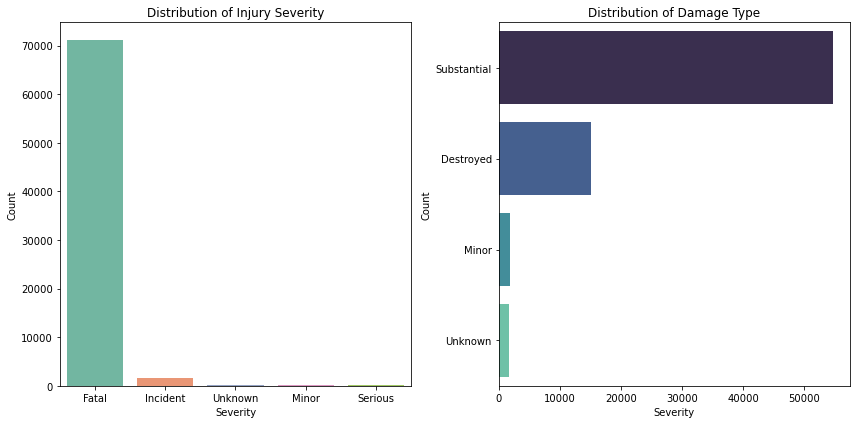

In [23]:
# Distribution of Injury Severity and Damage type
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (12, 6))

sns.countplot(x = 'Injury_Severity', data = df_clean, palette = 'Set2', ax = ax1)
ax1.set_title('Distribution of Injury Severity')
ax1.set_xlabel('Severity')
ax1.set_ylabel('Count')


sns.countplot(y = 'Damage_type', data = df_clean, 
              order = df_clean['Damage_type'].value_counts().index, palette = 'mako', ax = ax2)
ax2.set_title('Distribution of Damage Type')
ax2.set_xlabel('Severity')
ax2.set_ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show();

#### Interpretation:
1. The first distribution shows the majority of incidents from aircrafts result in 'Fatal' injuries, indicating that while accidents occur, they mostly do result in severe fatal injuries. 
2. The second plot demonstrates that 'Substantial' damage is the most prevalent type, followed by 'Destroyed'. 


### The objective is to identify aircraft models that offer the lowest risk profile. By focusing on aircraft models with a track record of high uninjured persons sustaining minor injuries and minor aircraft damages, we can reduce potential risks and ensuring overall safety. 

In [24]:
# Filter for aircraft accidents with minor damages, uninjured persons with 'Minor' or 'Incident' injury severities.
df_uninjured = df_clean[(df_clean['Uninjured'] > 0) & (df_clean['Damage_type'] == 'Minor') 
                       & (df_clean['Injury_Severity'].isin(['Minor', 'Incident']))]


##### What is the distribution of the aircraft types?

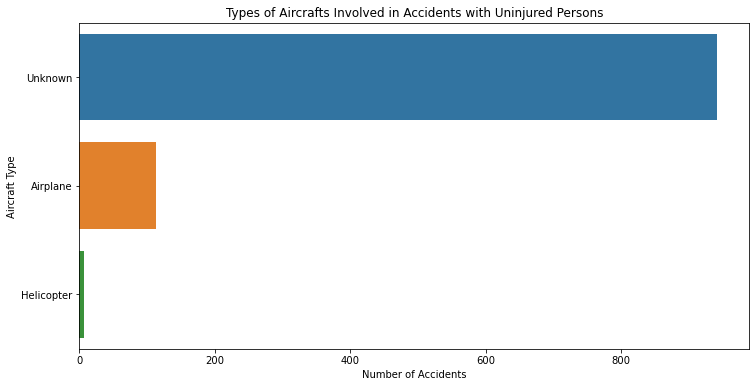

In [25]:
# Distribution of different aircraft types involved in the accidents
plt.figure(figsize=(12, 6))
sns.countplot(data=df_uninjured, y='Aircraft_Category', order=df_uninjured['Aircraft_Category'].value_counts().index)
plt.title('Types of Aircrafts Involved in Accidents with Uninjured Persons')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Type')
plt.show()

#### Interpretation:
The distribution shows that 'Airplane' and 'Helicopter' are the most common types. This insight can guide decisions regarding the types of aircraft to prioritize for safety considerations.


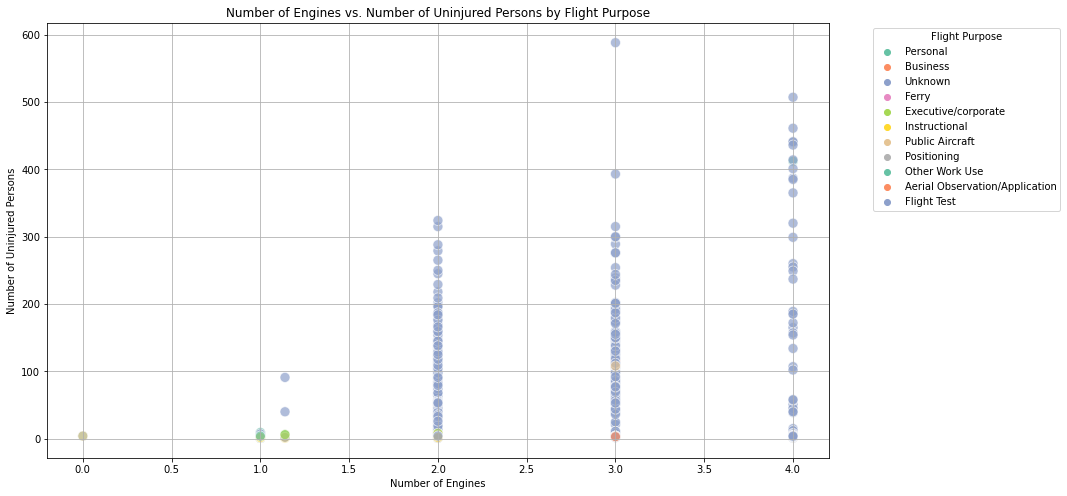

In [26]:
# Scatter plot of Number of Engines vs Number of Uninjured Persons, color-coded by Flight Purpose
plt.figure(figsize=(14, 8))
sns.scatterplot(
    data=df_uninjured,
    x='Engines',
    y='Uninjured',
    hue='Flight_Purpose',
    palette='Set2',
    s=100,  # size of points
    alpha=0.7  # transparency of points
)

plt.title('Number of Engines vs. Number of Uninjured Persons by Flight Purpose')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Uninjured Persons')
plt.legend(title='Flight Purpose', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


#### Interpretation:
The scatter plot indicates that most accidents (with injuries) involve aircraft with fewer engines and are primarily for personal flights or instructional purposes. This insight suggests that single-engine aircraft used for private ventures or training may present higher risks, since they contain less count of uninjured persons.


##### Top 10 Aircraft makes and models for specific flight purposes

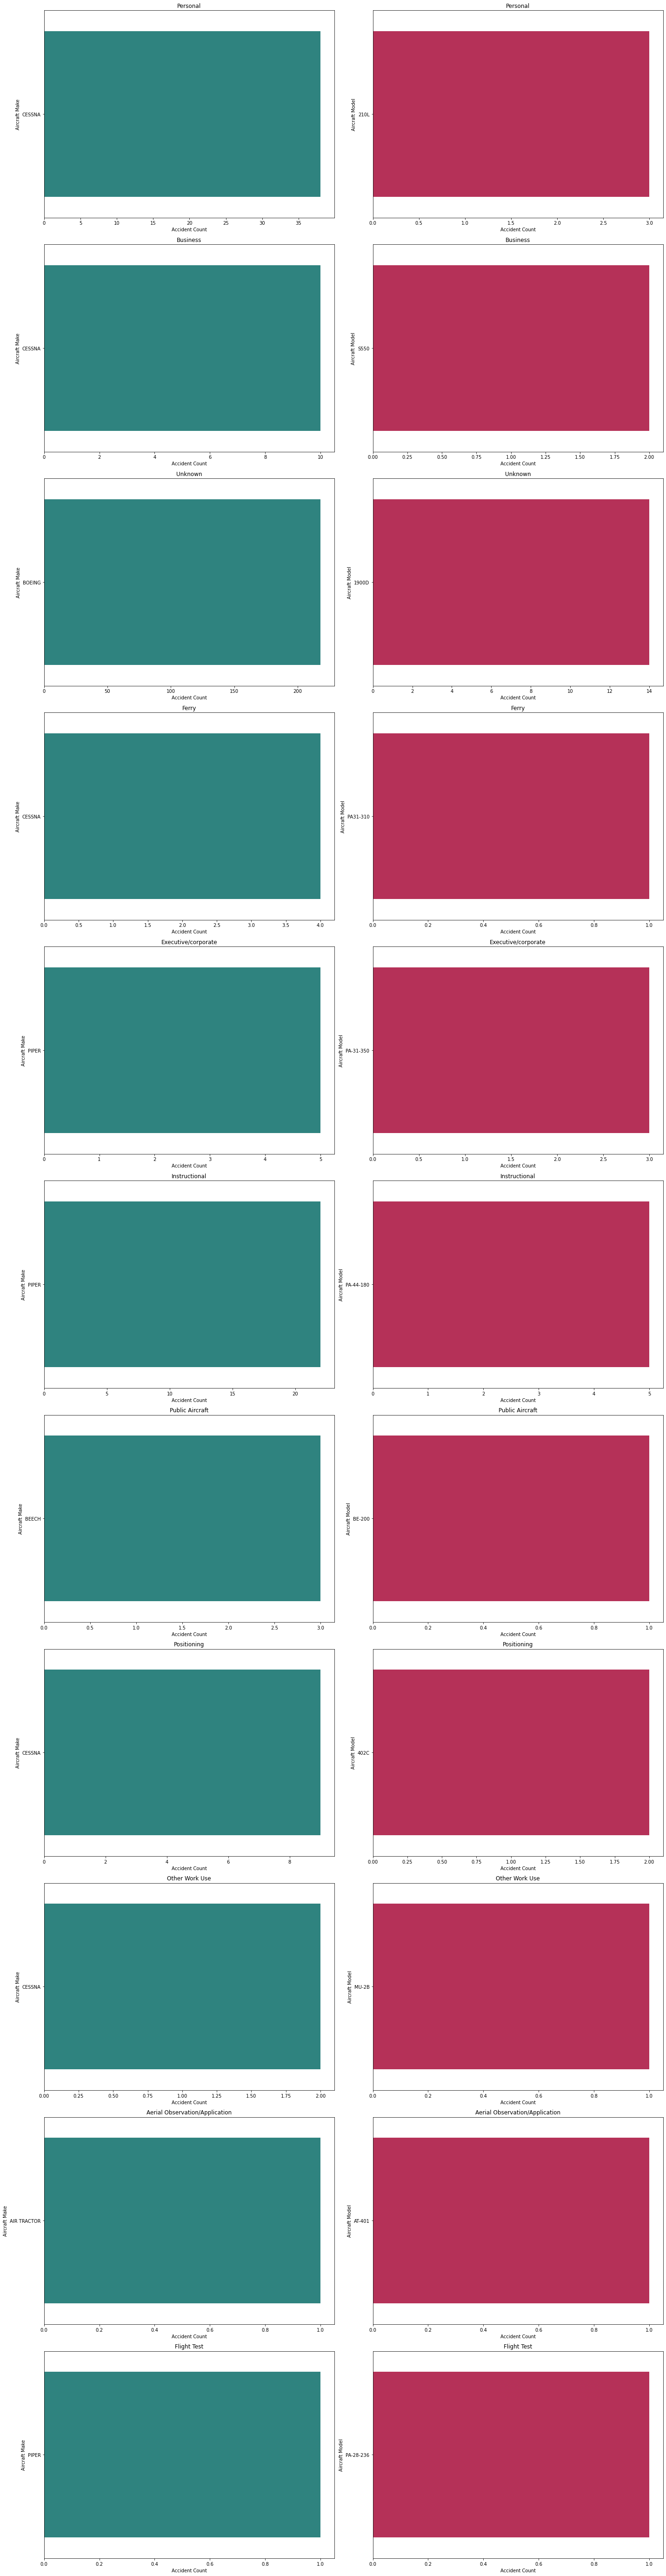

In [27]:
# Get top 10 counts for aircraft makes and models per flight purpose
flight_purposes = df_uninjured['Flight_Purpose'].unique()

fig, axes = plt.subplots(nrows=len(flight_purposes), ncols=2, figsize=(20, 7*len(flight_purposes)))

for i, purpose in enumerate(flight_purposes):
    # Filter the data for the specific flight purpose
    df_purpose = df_uninjured[df_uninjured['Flight_Purpose'] == purpose]
    
    # Get top 10 makes and models
    make_counts = df_purpose['Make'].value_counts().nlargest(1)
    model_counts = df_purpose['Model'].value_counts().nlargest(1)
    
    # Plotting accident counts by aircraft make for the specific flight purpose
    sns.barplot(x=make_counts.values, y=make_counts.index, palette='viridis', ax=axes[i, 0])
    axes[i, 0].set_title(purpose)
    axes[i, 0].set_xlabel('Accident Count')
    axes[i, 0].set_ylabel('Aircraft Make')
    
    # Plotting accident counts by aircraft model for the specific flight purpose
    sns.barplot(x=model_counts.values, y=model_counts.index, palette='rocket', ax=axes[i, 1])
    axes[i, 1].set_title(purpose)
    axes[i, 1].set_xlabel('Accident Count')
    axes[i, 1].set_ylabel('Aircraft Model')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### Interpretation: 
For each flight purpose, we observe the most frequently involved aircraft makes and models in accidents with minor damages and uninjured persons. This information can guide decisions on aircraft selection based on the intended purpose, highlighting potential risk factors associated with different aircraft models.


##### Correlation Analysis

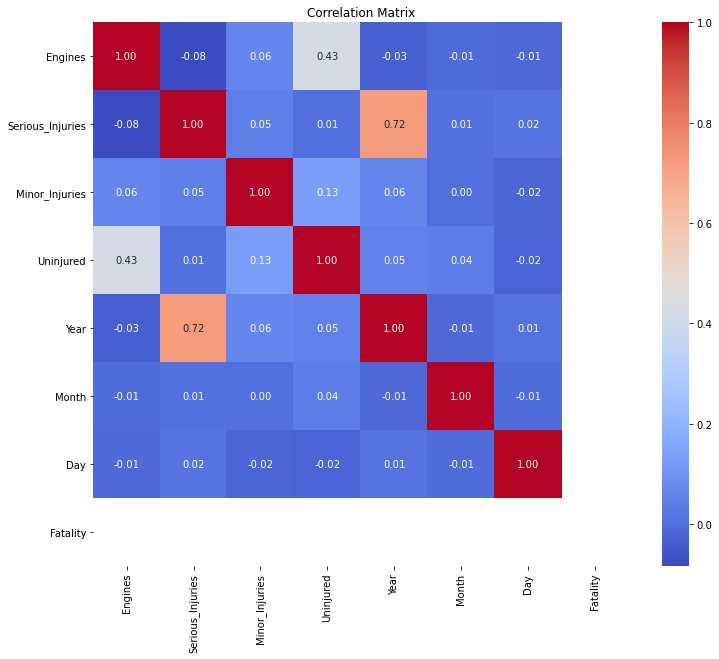

In [28]:
corr_matrix = df_uninjured.corr() # calculate the correlation matrix

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#### Interpretation: 
The heatmap shows there is no strong correlation observed between the variables, indicating that the factors influencing accidents, injuries, and damages are diverse and not highly interdependent. This suggests that various factors contribute independently to the outcomes of aviation accidents, emphasizing the importance of considering multiple variables in risk assessment and decision-making.


## Conclusion: 

The analysis reveals several key insights:

1. A declining trend in aviation accidents over the years suggests improvements in safety practices.
2. Aircraft accidents often result in fatal injuries and substantial damage.
3. Airplanes and helicopters are the most common types involved in accidents with highest count of uninjured persons.
4. Aircrafts with fewer engines tend to have higher involvement in high risk accidents.
5. There is no strong correlation observed between different variables in aviation accidents.


## Recommendation:
Based on the analysis findings, it is recommended that the company prioritize aircraft types, makes, and models with proven safety records and minimal involvement in accidents resulting in minor damages and uninjured persons. Specifically:

Aircraft Type:
1. Airplane: Considering the prevalence of airplane accidents with uninjured persons, models such as the Boeing 737 exhibit relatively lower risks.
2. Helicopter: Despite their utility, helicopters are also commonly involved in accidents, suggesting the need for careful evaluation before selection.

Flight Purposes (Top Models):
1. Personal: Aircraft models such as the Cessna 210L are recommended for personal use due to their relatively lower involvement in accidents resulting in minor damages and uninjured persons.
2. Business: For commercial ventures, aircraft models like the Cessna S550 are preferred, given their safety records.
3. Ferry: CESSNA PA-31-310
4. Executive/corporate: Airplane, PIPER PA-31-350
5. Instructional: Airplane, PIPER PA-44-180
6. Public Aircraft: BEECH BE-200
7. Positioning: CESSNA 402C
8. Other Work Use: CESSNA MU2B
9. Aerial Observation/Application: AIR TRACTOR AT-401
10. Flight Test: PIPER PA-28-236

Overall, the selection of aircraft should prioritize safety performance while ensuring alignment with operational needs. Thorough safety evaluations and ongoing monitoring of safety metrics are essential to mitigate risks and ensure the success and safety of aviation operations.

### Saving the clean preprocessed dataframe so as to use it in Tableau to create an interactive dashboard

In [29]:
df_clean.to_csv('preprocessed_aviation_data.csv', index=False)